# New York Airbnb Data Analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
data=pd.read_csv('datasets.csv', encoding_errors='ignore')

In [163]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3857863.0,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,40896611.0,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20724 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20724 non-null  object 
 1   name                            20724 non-null  object 
 2   host_id                         20724 non-null  object 
 3   host_name                       20724 non-null  object 
 4   neighbourhood_group             20724 non-null  object 
 5   neighbourhood                   20724 non-null  object 
 6   latitude                        20724 non-null  float64
 7   longitude                       20724 non-null  float64
 8   room_type                       20724 non-null  object 
 9   price                           20724 non-null  float64
 10  minimum_nights                  20724 non-null  float64
 11  number_of_reviews               20724 non-null  float64
 12  last_review                     20724

In [11]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,1.723592
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.211993
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


# Data Cleaning

In [27]:
# Dealing with null values

data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [23]:
# Dealing with duplicates

data.duplicated().sum()

12

In [9]:
# Dropping the duplicates

#data[data.duplicated()]
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [15]:
data.dtypes

#changing the data types

data['id']=data['id'].astype(object)
data['host_id']=data['host_id'].astype(object)

# EDA

## Univariate Analysis

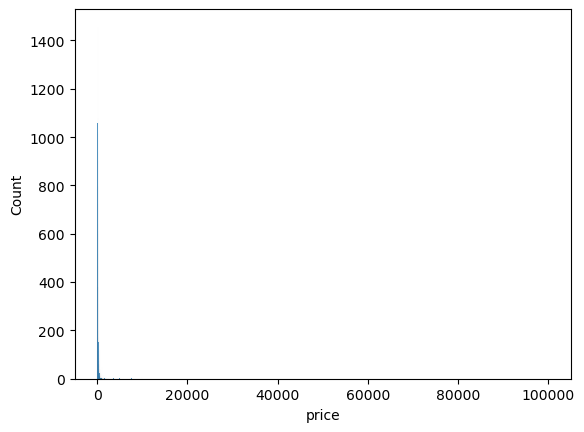

In [28]:
sns.histplot(data=data,x='price')
plt.show()

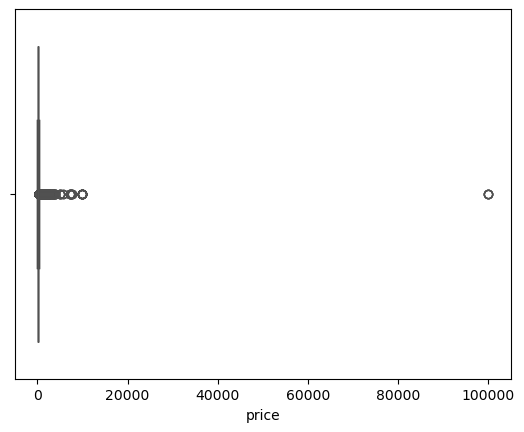

In [32]:
# identifying outliers in price

sns.boxplot(data=data,x='price')
plt.show()

In [46]:
df=data[data['price']<1500]

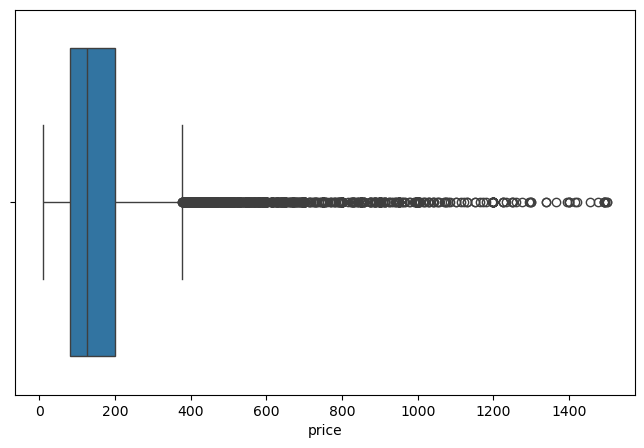

In [52]:
plt.figure(figsize=(8,5))

sns.boxplot(data=df,x='price')
plt.show()

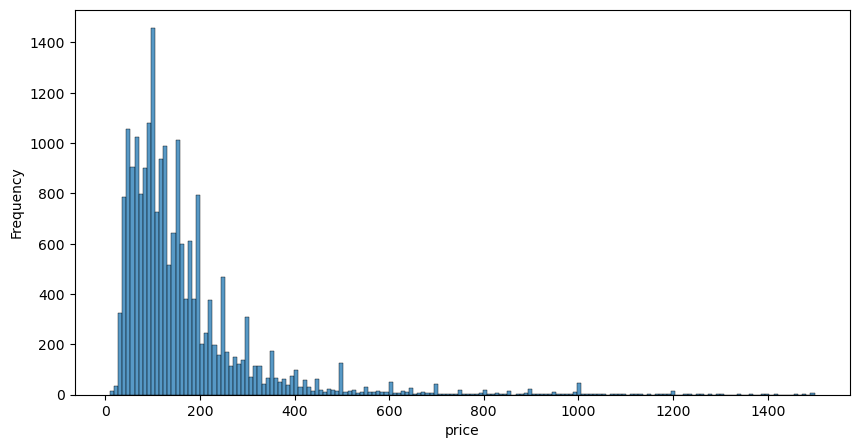

In [58]:
# Price Distribution

plt.figure(figsize=(10,5))
plt.ylabel('Frequency')

sns.histplot(data=df,x='price')
plt.show()

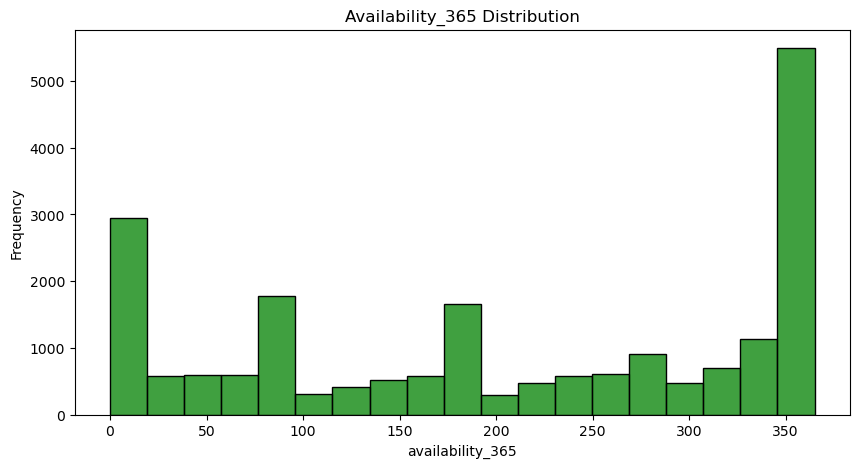

In [190]:
# availability_365 Distribution

plt.figure(figsize=(10,5))

sns.histplot(data=df,x='availability_365',color='green')
plt.ylabel('Frequency')
plt.title('Availability_365 Distribution')
plt.show()

In [133]:
df.groupby(by='neighbourhood_group')['price'].mean()

neighbourhood_group
Bronx            107.990506
Brooklyn         155.138317
Manhattan        204.146014
Queens           121.681939
Staten Island    118.780069
Name: price, dtype: float64

In [151]:
# Average Price Per bed
df.groupby(by='neighbourhood_group')['price_per_bed'].mean()

neighbourhood_group
Bronx             74.713639
Brooklyn          99.788493
Manhattan        138.708057
Queens            76.336210
Staten Island     67.728101
Name: price_per_bed, dtype: float64

In [153]:
# Feature Engineering

In [136]:
df['price_per_bed']=df['price']/df['beds']

/var/folders/vc/4b9h10p51h99m8_w7_zyttk80000gn/T/ipykernel_1357/694195027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_bed']=df['price']/df['beds']


## Bivariate Analysis

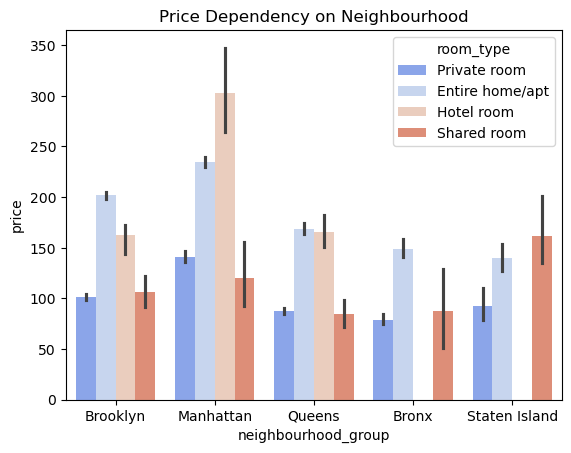

In [200]:
# Price Dependency on Neighbourhood
sns.barplot(x='neighbourhood_group', y='price',data=df,hue='room_type',palette='coolwarm')

plt.title('Price Dependency on Neighbourhood')
plt.show()

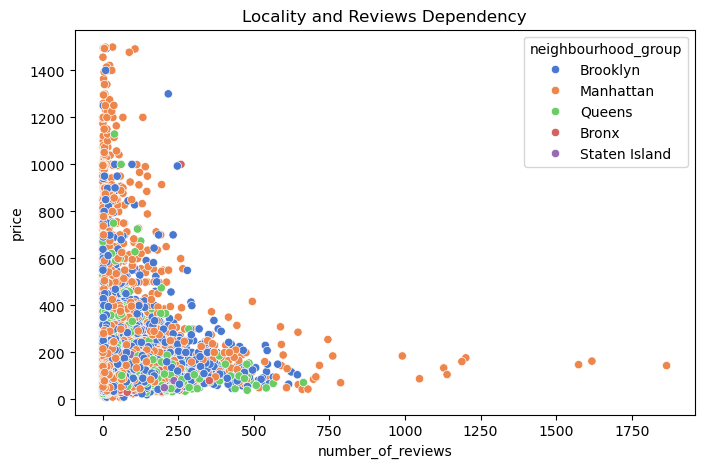

In [198]:
# Number of reviews and price dependency
plt.figure(figsize=(8,5))

sns.scatterplot(x='number_of_reviews',y='price',data=df, hue='neighbourhood_group',palette='muted')
plt.title('Locality and Reviews Dependency')
plt.show()

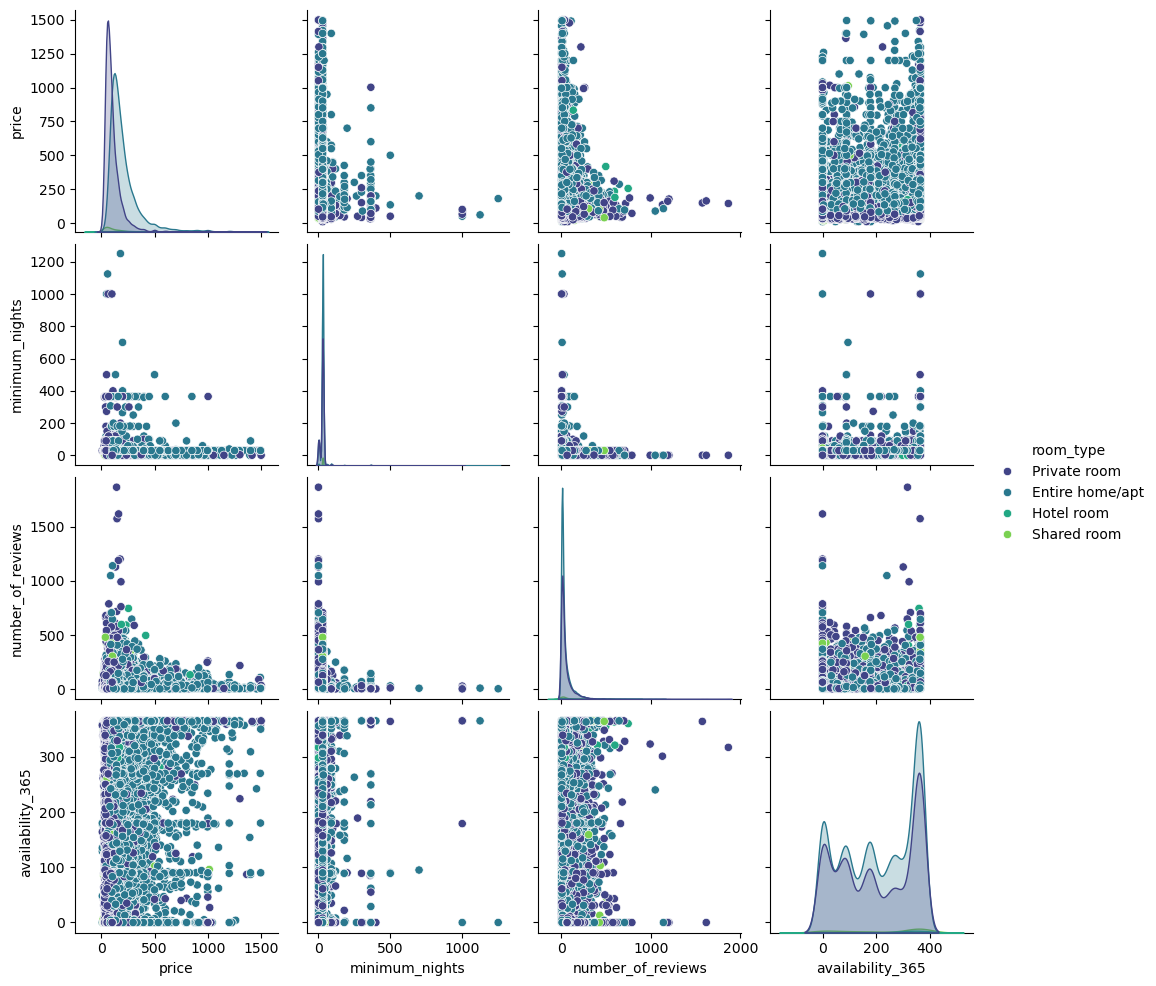

In [220]:
sns.pairplot(data=df,vars=['price','minimum_nights','number_of_reviews','availability_365'],hue='room_type',palette='viridis')
plt.show()

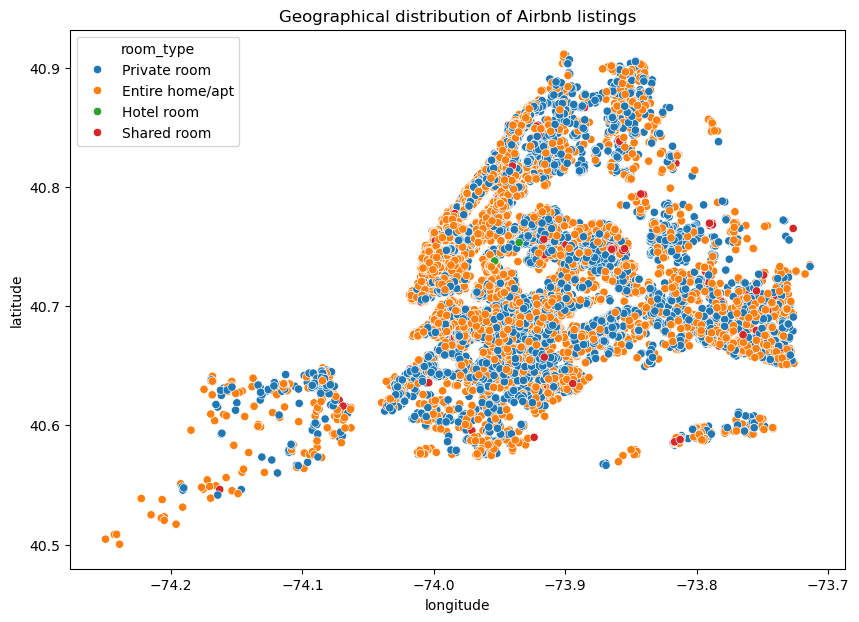

In [234]:
# Geographical distribution of Airbnb listings 

plt.figure(figsize=(10,7))

sns.scatterplot(data=df,x='longitude',y='latitude',hue='room_type')
plt.title('Geographical distribution of Airbnb listings')
plt.show()

In [236]:
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
price_per_bed                     float64
dtype: object

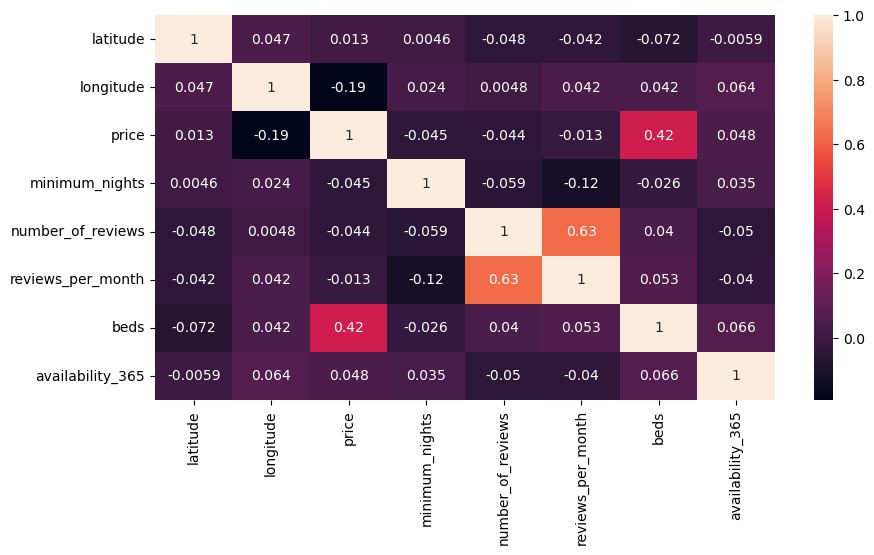

In [249]:
# Heat Map 

corr=df[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','beds','availability_365']].corr()

plt.figure(figsize=(10,5))
sns.heatmap(data=corr,annot=True)
plt.show()